In [3]:
#%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#파일 저장
import os



In [4]:
df = pd.read_csv('merged_data/result_total.csv',  header=1, encoding='euc-kr' )
df

,년도,자치구,사람 수,남자수,여자수,유기견수,복귀,입양분양,폐사안락사,계류기증,...,비거주용 건물내 주택_여,주택이외의 거처_남,주택이외의 거처_여,20세미만,20대,30대,40대,50대,60대,70대이상
0,2005,합계,10167344,5062492,5104852,14679,601,525,7736,5817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,종로구,169315,84981,84334,258,12,3,89,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,중구,130027,64995,65032,264,0,9,102,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,용산구,230260,113158,117102,383,12,12,170,189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,성동구,337744,169346,168398,431,19,7,96,309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2018,관악구,501957,252160,249797,493,207,275,11,-,...,3988.0,10141.0,9072.0,1048.0,44034.0,29453.0,12561.0,9599.0,7968.0,8070.0
360,2018,서초구,433951,207868,226083,124,42,15,64,3,...,703.0,3164.0,2883.0,504.0,8625.0,11800.0,7192.0,4776.0,4137.0,4103.0
361,2018,강남구,542364,259611,282753,158,58,41,57,2,...,1165.0,4985.0,4935.0,421.0,13164.0,20173.0,10591.0,6413.0,5760.0,6205.0
362,2018,송파구,666635,323526,343109,211,57,62,90,2,...,844.0,5549.0,5669.0,286.0,12058.0,18041.0,10580.0,8130.0,7496.0,6860.0


In [5]:
#2005년도 인구수 추출

df[df['년도']==2005]
df_person = df.iloc[0:26 ,[2,3,4]]
df_person

,사람 수,남자수,여자수
0,10167344,5062492,5104852
1,169315,84981,84334
2,130027,64995,65032
3,230260,113158,117102
4,337744,169346,168398
5,375613,187320,188293
6,381110,192317,188793
7,427373,213775,213598
8,462879,230451,232428
9,353260,175723,177537


In [6]:
#년도별 유기견 수 추출
df_sum = df[df['자치구']=='합계']
df_dog = df_sum.iloc[:,[0,5]]

#년도 열을 인덱싱
df_dog = df_dog .set_index("년도")
df_dog


,유기견수
년도,
2005,14679
2006,11423
2007,9910
2008,11279
2009,10947
2010,11120
2011,8523
2012,7860
2013,7803


In [7]:
#년도별 유기견 처리방식 추출 및 예측
df_sum = df[df['자치구']=='합계']
df_dog_how = df_sum.iloc[:,[0,6,7,8,9]].replace('-',0)

#년도 열을 인덱싱
df_dog_how = df_dog_how.set_index("년도")
df_dog_how

,복귀,입양분양,폐사안락사,계류기증
년도,,,,
2005,601,525,7736,5817
2006,666,695,5310,4752
2007,787,929,8189,5
2008,1370,3206,6435,268
2009,1733,3779,5147,288
2010,2006,3460,4923,731
2011,1759,2376,4365,23
2012,1762,2327,3310,461
2013,2007,1660,3690,446


In [8]:
#string에서 int로 타입 변환
#[계류기증 2014년도 0값 = object]

df_dog_how["계류기증"] = df_dog_how["계류기증"].astype(int)
df_dog_how[df_dog_how["계류기증"]==0]["계류기증"]

년도
2014    0
Name: 계류기증, dtype: int32

In [9]:
#유기견 처리방식 방법별로 열 추가

df_dog_how["긍정적 처리"] = df_dog_how["복귀"]+df_dog_how["입양분양"]
df_dog_how["부정적 처리"] = df_dog_how["폐사안락사"]+df_dog_how["계류기증"]
df_dog_how_re = df_dog_how.iloc[:,[4,5]]
df_dog_how_re

,긍정적 처리,부정적 처리
년도,,
2005,1126,13553
2006,1361,10062
2007,1716,8194
2008,4576,6703
2009,5512,5435
2010,5466,5654
2011,4135,4388
2012,4089,3771
2013,3667,4136


In [10]:
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgunsl.ttf').get_name()
mpl.rc('font', family=font_name)

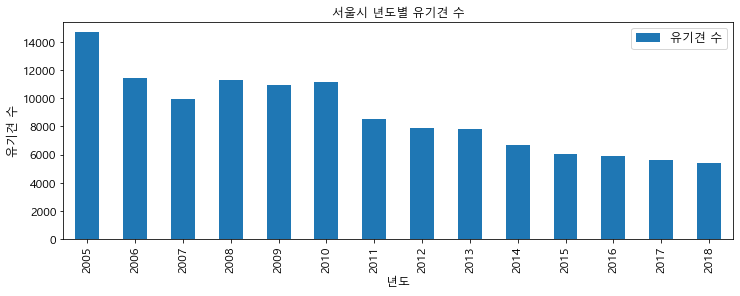

In [11]:
#서울시 년도별 유기견 수 [시각화]
ax = df_dog.plot(kind="bar", title="서울시 년도별 유기견 수", figsize=(12,4), legend=True, fontsize=12)
ax.set_xlabel("년도", fontsize=12)
ax.set_ylabel("유기견 수", fontsize=12)
ax.legend(["유기견 수"], fontsize=12)

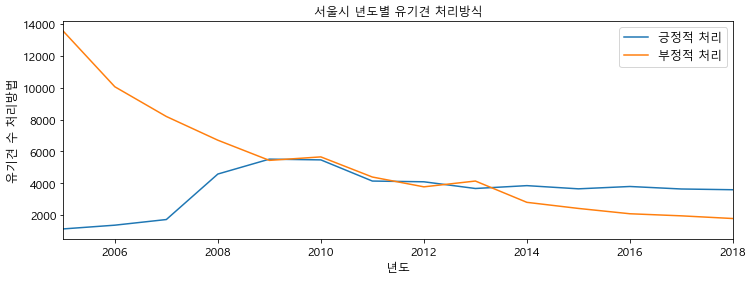

In [12]:
#서울시 년도별 유기견 처리방식
ax = df_dog_how_re.plot(kind="line", title="서울시 년도별 유기견 처리방식", figsize=(12,4), legend=True, fontsize=12)
ax.set_xlabel("년도", fontsize=12)
ax.set_ylabel("유기견 수 처리방법", fontsize=12)
ax.legend(['긍정적 처리','부정적 처리'], fontsize=12)

In [13]:
#년도별, 구별, 유기견수 데이터프레임 추출
df_3d_data = df.iloc[:,[0,1,5]]

#예쁜 시각화를 위해 자치구가 '합계'인 ROW 삭제
df_3d_data = df_3d_data[df_3d_data['자치구'] != '합계']

#년도 컬럼을 인덱싱 -  자치구 값이 '합계'인 ROW 삭제 후 ROW INDEX도 삭제되어 리셋하기 위함 
df_3d_data= df_3d_data.set_index('년도')

#년도로 인덱싱된 데이터 프레임의 인덱스를 정수로 리셋
df_3d_data =df_3d_data.reset_index()
df_3d_data

,년도,자치구,유기견수
0,2005,종로구,258
1,2005,중구,264
2,2005,용산구,383
3,2005,성동구,431
4,2005,광진구,788
...,...,...,...
345,2018,관악구,493
346,2018,서초구,124
347,2018,강남구,158
348,2018,송파구,211


In [14]:
#년도별/지역별/유기견 수 3d 시각화
#년도, 지역 - 컬럼으로 추출
#X = df_year, Y = df_regiond, data = 유기견 수
        
df_year = df_3d_data.drop_duplicates('년도', keep='first')['년도']
df_region = df_3d_data.drop_duplicates('자치구', keep='first')['자치구']
df_dog_count = df_3d_data['유기견수']

df_3d_data



,년도,자치구,유기견수
0,2005,종로구,258
1,2005,중구,264
2,2005,용산구,383
3,2005,성동구,431
4,2005,광진구,788
...,...,...,...
345,2018,관악구,493
346,2018,서초구,124
347,2018,강남구,158
348,2018,송파구,211


In [15]:
# 년도와 자치구 리스트 확인
print(list(df_year))
print(list(df_region))
#print(list(df_dog_count))
#자치구 리스트에서 합계 빼기


[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']


In [16]:
var = '관악구'
list(df_region).index(var)

20

In [17]:
df_3d_data['년도_num']=0
df_3d_data['자치구_num']=1
df_3d_data

,년도,자치구,유기견수,년도_num,자치구_num
0,2005,종로구,258,0,1
1,2005,중구,264,0,1
2,2005,용산구,383,0,1
3,2005,성동구,431,0,1
4,2005,광진구,788,0,1
...,...,...,...,...,...
345,2018,관악구,493,0,1
346,2018,서초구,124,0,1
347,2018,강남구,158,0,1
348,2018,송파구,211,0,1


In [ ]:
##### 2014년부터 데이터 출력 및 3D 그래프 #####

In [21]:
df_3d_data = df_3d_data[df_3d_data['년도']>=2014]

In [27]:
df_3d_data= df_3d_data.set_index('년도').reset_index()

In [28]:
len(df_3d_data)

125

In [29]:
df_3d_data.loc[:,'자치구_num']

0      1
1      1
2      1
3      1
4      1
      ..
120    1
121    1
122    1
123    1
124    1
Name: 자치구_num, Length: 125, dtype: int64

In [30]:
for i in range(len(df_3d_data)):
    print(list(df_3d_data.loc[i]))

[2014, '종로구', 150, 0, 1]
[2014, '중구', 106, 0, 1]
[2014, '용산구', 330, 0, 1]
[2014, '성동구', 168, 0, 1]
[2014, '광진구', 227, 0, 1]
[2014, '동대문구', 287, 0, 1]
[2014, '중랑구', 366, 0, 1]
[2014, '성북구', 293, 0, 1]
[2014, '강북구', 307, 0, 1]
[2014, '도봉구', 273, 0, 1]
[2014, '노원구', 209, 0, 1]
[2014, '은평구', 400, 0, 1]
[2014, '서대문구', 237, 0, 1]
[2014, '마포구', 347, 0, 1]
[2014, '양천구', 386, 0, 1]
[2014, '강서구', 321, 0, 1]
[2014, '구로구', 225, 0, 1]
[2014, '금천구', 169, 0, 1]
[2014, '영등포구', 157, 0, 1]
[2014, '동작구', 314, 0, 1]
[2014, '관악구', 476, 0, 1]
[2014, '서초구', 143, 0, 1]
[2014, '강남구', 173, 0, 1]
[2014, '송파구', 271, 0, 1]
[2014, '강동구', 309, 0, 1]
[2015, '종로구', 159, 0, 1]
[2015, '중구', 82, 0, 1]
[2015, '용산구', 287, 0, 1]
[2015, '성동구', 158, 0, 1]
[2015, '광진구', 240, 0, 1]
[2015, '동대문구', 249, 0, 1]
[2015, '중랑구', 290, 0, 1]
[2015, '성북구', 280, 0, 1]
[2015, '강북구', 307, 0, 1]
[2015, '도봉구', 238, 0, 1]
[2015, '노원구', 243, 0, 1]
[2015, '은평구', 348, 0, 1]
[2015, '서대문구', 213, 0, 1]
[2015, '마포구', 268, 0, 1]
[2015, '양천구', 344, 0, 1

In [31]:
#3D그래프에 넣을 인덱스화한 데이터 리스트
data_3d_list=[]

In [32]:
for i in range(len(df_3d_data)):
    data_row_list = list(df_3d_data.loc[i]) 
    #a = data_row_list[0]
    df_year_idx = list(df_year).index(data_row_list[0])
    df_region_idx = list(df_region).index(data_row_list[1])
    
    df_3d_data.loc[i,'년도_num'] = df_year_idx
    df_3d_data.loc[i,'자치구_num'] = df_region_idx
    
    data_3d_list.append([df_region_idx,df_year_idx,data_row_list[2]])
print(data_3d_list)

[[0, 9, 150], [1, 9, 106], [2, 9, 330], [3, 9, 168], [4, 9, 227], [5, 9, 287], [6, 9, 366], [7, 9, 293], [8, 9, 307], [9, 9, 273], [10, 9, 209], [11, 9, 400], [12, 9, 237], [13, 9, 347], [14, 9, 386], [15, 9, 321], [16, 9, 225], [17, 9, 169], [18, 9, 157], [19, 9, 314], [20, 9, 476], [21, 9, 143], [22, 9, 173], [23, 9, 271], [24, 9, 309], [0, 10, 159], [1, 10, 82], [2, 10, 287], [3, 10, 158], [4, 10, 240], [5, 10, 249], [6, 10, 290], [7, 10, 280], [8, 10, 307], [9, 10, 238], [10, 10, 243], [11, 10, 348], [12, 10, 213], [13, 10, 268], [14, 10, 344], [15, 10, 285], [16, 10, 193], [17, 10, 139], [18, 10, 159], [19, 10, 258], [20, 10, 519], [21, 10, 129], [22, 10, 157], [23, 10, 237], [24, 10, 278], [0, 11, 165], [1, 11, 85], [2, 11, 252], [3, 11, 161], [4, 11, 199], [5, 11, 266], [6, 11, 310], [7, 11, 277], [8, 11, 280], [9, 11, 212], [10, 11, 251], [11, 11, 308], [12, 11, 198], [13, 11, 240], [14, 11, 306], [15, 11, 288], [16, 11, 163], [17, 11, 164], [18, 11, 175], [19, 11, 277], [20, 1

In [33]:
data_3d_list

[[0, 9, 150],
 [1, 9, 106],
 [2, 9, 330],
 [3, 9, 168],
 [4, 9, 227],
 [5, 9, 287],
 [6, 9, 366],
 [7, 9, 293],
 [8, 9, 307],
 [9, 9, 273],
 [10, 9, 209],
 [11, 9, 400],
 [12, 9, 237],
 [13, 9, 347],
 [14, 9, 386],
 [15, 9, 321],
 [16, 9, 225],
 [17, 9, 169],
 [18, 9, 157],
 [19, 9, 314],
 [20, 9, 476],
 [21, 9, 143],
 [22, 9, 173],
 [23, 9, 271],
 [24, 9, 309],
 [0, 10, 159],
 [1, 10, 82],
 [2, 10, 287],
 [3, 10, 158],
 [4, 10, 240],
 [5, 10, 249],
 [6, 10, 290],
 [7, 10, 280],
 [8, 10, 307],
 [9, 10, 238],
 [10, 10, 243],
 [11, 10, 348],
 [12, 10, 213],
 [13, 10, 268],
 [14, 10, 344],
 [15, 10, 285],
 [16, 10, 193],
 [17, 10, 139],
 [18, 10, 159],
 [19, 10, 258],
 [20, 10, 519],
 [21, 10, 129],
 [22, 10, 157],
 [23, 10, 237],
 [24, 10, 278],
 [0, 11, 165],
 [1, 11, 85],
 [2, 11, 252],
 [3, 11, 161],
 [4, 11, 199],
 [5, 11, 266],
 [6, 11, 310],
 [7, 11, 277],
 [8, 11, 280],
 [9, 11, 212],
 [10, 11, 251],
 [11, 11, 308],
 [12, 11, 198],
 [13, 11, 240],
 [14, 11, 306],
 [15, 11, 288],
 

In [34]:
df_3d_data

,년도,자치구,유기견수,년도_num,자치구_num
0,2014,종로구,150,9,0
1,2014,중구,106,9,1
2,2014,용산구,330,9,2
3,2014,성동구,168,9,3
4,2014,광진구,227,9,4
...,...,...,...,...,...
120,2018,관악구,493,13,20
121,2018,서초구,124,13,21
122,2018,강남구,158,13,22
123,2018,송파구,211,13,23


In [35]:
#!pip install pyecharts==0.5.11

In [36]:
#원본
from pyecharts import Bar3D

bar3d = Bar3D("3D Graph", width=1200, height=600)

x_axis = df_year #년도 2005-2018
y_axis = df_region #26개 구


data = data_3d_list
range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d.add(
    "",
    x_axis,
    y_axis,
    [[d[1], d[0], d[2]] for d in data],
    is_visualmap=True,
    visual_range=[0, 900],
    visual_range_color=range_color,
    grid3d_width=100,
    grid3d_depth=80,
)
bar3d.width=700
bar3d.height=500

bar3d

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "C:\ai\python\anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [37]:
df_year_list=list(df_year)
print(df_year_list)
df_region_list=list(df_region)
print(df_region_list)

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']


In [38]:
str = '0,23,55555'
str.split(',')

['0', '23', '55555']

In [39]:
str = '0,23,55555'
vals = str.split(',')
year_idx=int(vals[0])
region_idx=int(vals[1])
re_year = df_year_list[year_idx]
re_region = df_region_list[region_idx]

result_str = f'년도:{re_year}, 자치구:{re_region}, 유기견 수:{vals[2]}'
result_str

'년도:2005, 자치구:송파구, 유기견 수:55555'

In [40]:
def label_formatter(params):
    vals = params.value.split(',')
    year_idx=int(vals[0])
    region_idx=int(vals[1])
    re_year = df_year_list[year_idx]
    re_region = df_region_list[region_idx]
    
    result_str = f'년도:{re_year}, 자치구:{re_region}, 유기견 수:{vals[2]}'
    #return params.value+f'[{result_str}]'
    return params.value+'[sss]'

In [41]:
def lf1(params):
    vals = params.value.split(',')
    year_idx=int(vals[0])
    region_idx=int(vals[1])
    re_year = df_year_list[year_idx]
    re_region = df_region_list[region_idx]
    
    #result_str = '년도:'+re_year+', 자치구:'+re_region+', 유기견 수:'+vals[2]
    result_str = '년도:'+re_year
    return result_str

In [42]:
va = 1
sde = str
sde

'0,23,55555'

In [43]:
['1','2','3']

['1', '2', '3']

In [44]:
#됨 - value가 없어도 되긴함. string만 보내도 나오긴함
def lf4(params):
    str='[dd2d]'
    str='dddd'
    return str

#안됨 - string의 list는 안됨
def lf5(params):
    vals = params.value.split(',')
    return vals

#number의 list는 됨
def lf6(params):
    vals = [1,2,3]
    return vals

#뭐지 str과 num의 합 넘어감
def lf9(params):
    num = 1
    str = "년도"
    return str+num+1


def lf8(params):
    vals = params.value.split(',')
    year_idx=int(vals[0])
    region_idx=int(vals[1])
    re_year = df_year_list[year_idx]
    re_region = df_region_list[region_idx]
    
    #result_str = '년도:'+str(re_year)+', 자치구:'+str(re_region)+', 유기견 수:'+vals[2]
    result_str = f'년도: {re_year}, 자치구:{re_region}, 유기견 수:{vals[2]}'
    return result_str



In [45]:
lf8('ss')

AttributeError: 'str' object has no attribute 'value'

In [46]:
#수정 - 진범
from pyecharts import Bar3D

bar3d = Bar3D("3D Graph", width=1200, height=600)

x_axis = df_year #년도 2005-2018
y_axis = df_region #26개 구

#x_axis = df_region 
#y_axis = df_year 

data = data_3d_list
range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d.add(
    "자치구별,년도별 유기견 수",
    x_axis,
    y_axis,
    [[d[1], d[0], d[2]] for d in data],
    grid3d_width=100,
    grid3d_depth=250,
    
    datazoom_type='both',
    datazoom_orient='horizontal',
    
    #visualMap 설정
    is_visualmap=True,
    visual_range=[0, 900],
    visual_range_color=range_color,
    visual_top='bottom',

    #x축 설정
    xaxis3d_name='년도',
    xaxis3d_interval=0,  #0으로 하면 모든 레이블 강제 표시 (axis3D 설정 봐야함)
    xaxis3d_margin=5,
    
    #y축 설정
    yaxis3d_name='자치구',
    yaxis3d_interval=0,
    
    #z축 설정
    zaxis3d_name='유기견 수',
    
    #tooltip 설정
    tooltip_trigger='item',
    #tooltip_formatter=lf7
)

#이건 전체 표출되는 화면 크기
bar3d.width=1000 #너비
bar3d.height=1000 #높이

bar3d

In [47]:
#수정용
from pyecharts import Bar3D

bar3d = Bar3D("3D Graph", width=3000, height=1000)

x_axis = df_year #년도 2005-2018
y_axis = df_region #26개 구


data = data_3d_list
range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d.add(
    "",
    x_axis,
    y_axis,
    [[d[1], d[0], d[2]] for d in data],
    is_visualmap=True,
    visual_range=[0, 900],
    visual_range_color=range_color,
    grid3d_width=100,
    grid3d_depth=300,
)
bar3d.width=700
bar3d.height=500

bar3d

In [36]:
from pyecharts import Bar3D

bar3d = Bar3D("3D Graph", width=1200, height=600)
x_axis = [
    "12a", "1a", "2a", "3a", "4a", "5a", "6a", "7a", "8a", "9a", "10a", "11a",
    "12p", "1p", "2p", "3p", "4p", "5p", "6p", "7p", "8p", "9p", "10p", "11p"
    ]
y_axis = [
    "Saturday", "Friday", "Thursday", "Wednesday", "Tuesday", "Monday", "Sunday"
    ]
data = [
    [0, 0, 5], [0, 1, 1], [0, 2, 0], [0, 3, 0], [0, 4, 0], [0, 5, 0],
    [0, 6, 0], [0, 7, 0], [0, 8, 0], [0, 9, 0], [0, 10, 0], [0, 11, 2],
    [0, 12, 4], [0, 13, 1], [0, 14, 1], [0, 15, 3], [0, 16, 4], [0, 17, 6],
    [0, 18, 4], [0, 19, 4], [0, 20, 3], [0, 21, 3], [0, 22, 2], [0, 23, 5],
    [1, 0, 7], [1, 1, 0], [1, 2, 0], [1, 3, 0], [1, 4, 0], [1, 5, 0],
    [1, 6, 0], [1, 7, 0], [1, 8, 0], [1, 9, 0], [1, 10, 5], [1, 11, 2],
    [1, 12, 2], [1, 13, 6], [1, 14, 9], [1, 15, 11], [1, 16, 6], [1, 17, 7],
    [1, 18, 8], [1, 19, 12], [1, 20, 5], [1, 21, 5], [1, 22, 7], [1, 23, 2],
    [2, 0, 1], [2, 1, 1], [2, 2, 0], [2, 3, 0], [2, 4, 0], [2, 5, 0],
    [2, 6, 0], [2, 7, 0], [2, 8, 0], [2, 9, 0], [2, 10, 3], [2, 11, 2],
    [2, 12, 1], [2, 13, 9], [2, 14, 8], [2, 15, 10], [2, 16, 6], [2, 17, 5],
    [2, 18, 5], [2, 19, 5], [2, 20, 7], [2, 21, 4], [2, 22, 2], [2, 23, 4],
    [3, 0, 7], [3, 1, 3], [3, 2, 0], [3, 3, 0], [3, 4, 0], [3, 5, 0],
    [3, 6, 0], [3, 7, 0], [3, 8, 1], [3, 9, 0], [3, 10, 5], [3, 11, 4],
    [3, 12, 7], [3, 13, 14], [3, 14, 13], [3, 15, 12], [3, 16, 9], [3, 17, 5],
    [3, 18, 5], [3, 19, 10], [3, 20, 6], [3, 21, 4], [3, 22, 4], [3, 23, 1],
    [4, 0, 1], [4, 1, 3], [4, 2, 0], [4, 3, 0], [4, 4, 0], [4, 5, 1],
    [4, 6, 0], [4, 7, 0], [4, 8, 0], [4, 9, 2], [4, 10, 4], [4, 11, 4],
    [4, 12, 2], [4, 13, 4], [4, 14, 4], [4, 15, 14], [4, 16, 12], [4, 17, 1],
    [4, 18, 8], [4, 19, 5], [4, 20, 3], [4, 21, 7], [4, 22, 3], [4, 23, 0],
    [5, 0, 2], [5, 1, 1], [5, 2, 0], [5, 3, 3], [5, 4, 0], [5, 5, 0],
    [5, 6, 0], [5, 7, 0], [5, 8, 2], [5, 9, 0], [5, 10, 4], [5, 11, 1],
    [5, 12, 5], [5, 13, 10], [5, 14, 5], [5, 15, 7], [5, 16, 11], [5, 17, 6],
    [5, 18, 0], [5, 19, 5], [5, 20, 3], [5, 21, 4], [5, 22, 2], [5, 23, 0],
    [6, 0, 1], [6, 1, 0], [6, 2, 0], [6, 3, 0], [6, 4, 0], [6, 5, 0],
    [6, 6, 0], [6, 7, 0], [6, 8, 0], [6, 9, 0], [6, 10, 1], [6, 11, 0],
    [6, 12, 2], [6, 13, 1], [6, 14, 3], [6, 15, 4], [6, 16, 0], [6, 17, 0],
    [6, 18, 0], [6, 19, 0], [6, 20, 1], [6, 21, 2], [6, 22, 2], [6, 23, 6]
    ]
range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d.add(
    "",
    x_axis,
    y_axis,
    [[d[1], d[0], d[2]] for d in data],
    is_visualmap=True,
    visual_range=[0, 20],
    visual_range_color=range_color,
    grid3d_width=200,
    grid3d_depth=80,
)
bar3d.width=700
bar3d.height=500

bar3d